In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

CURRENT_YEAR = 2024
MAX_YEAR = 2124
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.04856  | 1.39      | 4.007     | 0.1639    |
| 49        | -0.03152  | 1.156     | 4.313     | 0.231     |
| 50        | -0.01983  | 0.7777    | 4.611     | 0.2963    |
| 60        | -0.01669  | 0.9446    | 4.798     | 0.2998    |
| 97        | -0.0164   | 0.6043    | 4.879     | 0.3664    |
Curve params found
{'push': 0.6043056232645482,
 'shift': 4.879048711083056,
 'slope': 0.36640727922817884}
-
## Chance of nonscaling delay ##


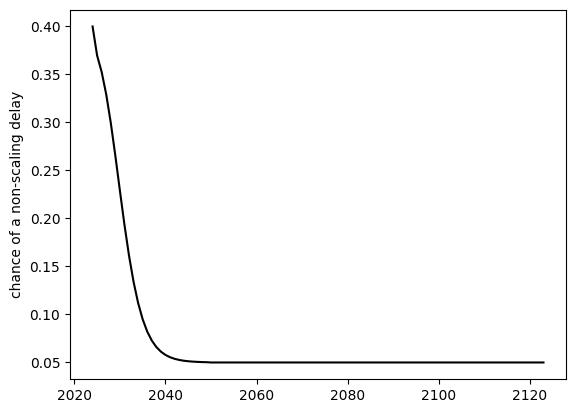

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 35%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2034

In [2]:
nonscaling_points = [(2024, 0.4),
                     (2027, 0.3),
                     (2030, 0.2),
                     (2035, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.1952   | 2.578     | 4.654     | 6.133     |
| 6         | -0.1639   | 2.415     | 5.768     | 1.167     |
| 7         | -0.125    | 0.1392    | 3.622     | 9.578     |
| 8         | -0.1008   | 1.731     | 6.81      | 0.1271    |
| 14        | -0.03431  | 1.038     | 6.718     | 0.528     |
Curve params found
{'push': 1.0380542800464008,
 'shift': 6.717555838557789,
 'slope': 0.5279751127299037}
-
## Chance of nonscaling delay ##


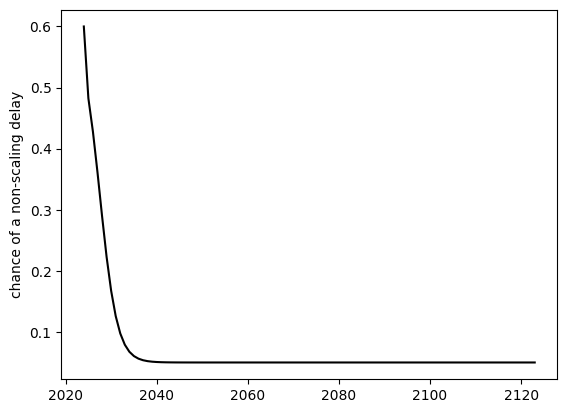

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 48%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 43%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 36%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2034 

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2024, 0.6),
                     (2026, 0.4),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1856   | 1.594     | 8.868     | 3.158     |
| 11        | -0.1682   | 0.9181    | 5.946     | 5.832     |
| 20        | -0.15     | 0.1818    | 6.819     | 6.495     |
| 22        | -0.15     | 0.04958   | 8.179     | 9.822     |
| 42        | -0.15     | 0.08117   | 7.632     | 4.606     |
| 52        | -0.1493   | 0.0726    | 9.916     | 3.417     |
| 63        | -0.1459   | 0.01      | 8.574     | 3.448     |
| 72        | -0.103    | 0.1509    | 9.867     | 1.713     |
| 81        | -0.07648  | 0.07981   | 9.991     | 1.736     |
| 82        | -0.0315   | 0.02083   | 9.899     | 1.906     |
| 116       | -0.026    | 0.02081   | 9.913     | 1.869     |
Curve params found
{'push': 0.020812510697400886,
 'shift': 9.912800154117916,
 'slope': 1.869334409116361}
-
## Chance of nonscaling delay ##


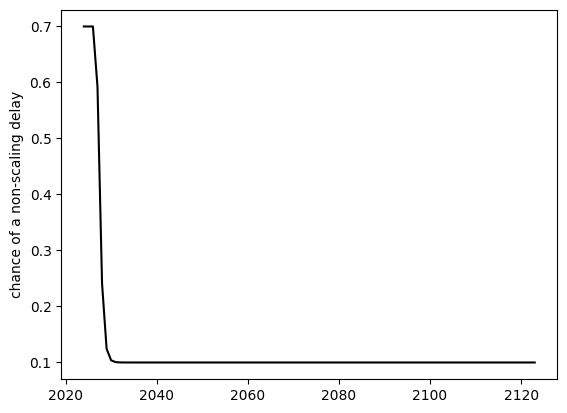

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2034

In [4]:
nonscaling_points = [(2024, 0.7),
                     (2027, 0.6),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.0613   | 1.208     | 6.891     | 9.259     |
| 8         | -0.05725  | 0.6379    | 2.953     | 5.094     |
| 13        | -0.0348   | 0.1514    | 0.465     | 0.3463    |
| 43        | -0.03382  | 0.01      | 0.7653    | 0.9236    |
| 71        | -0.02049  | 0.08901   | 0.5234    | 0.3686    |
| 77        | -0.01637  | 1.084     | 6.726     | 0.2401    |
| 80        | -0.01518  | 0.9854    | 6.914     | 0.2042    |
| 88        | -0.01401  | 1.037     | 7.206     | 0.2094    |
Curve params found
{'push': 1.0369552684921308,
 'shift': 7.205822223549086,
 'slope': 0.20941094239456035}
-
## Chance of nonscaling delay ##


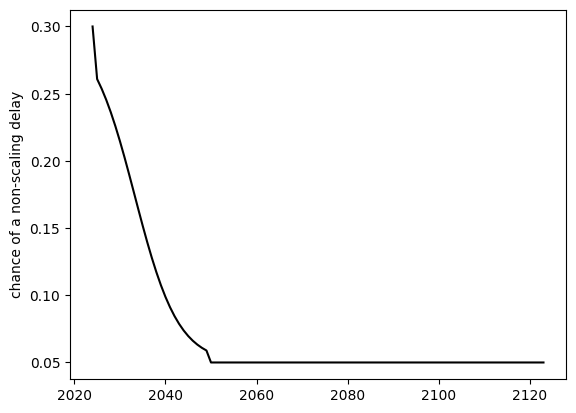

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2034

In [5]:
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.09877  | 6.069     | 3.503     | 4.884     |
| 3         | -0.09319  | 6.466     | 9.914     | 2.039     |
| 7         | -0.08498  | 3.876     | 8.484     | 2.423     |
| 8         | -0.05979  | 0.5691    | 1.872     | 5.562     |
| 31        | -0.05908  | 1.193     | 8.979     | 4.158     |
| 41        | -0.04981  | 0.01      | 7.074     | 2.062     |
| 62        | -0.04825  | 0.788     | 9.999     | 0.842     |
| 84        | -0.04612  | 0.01      | 10.0      | 1.609     |
| 110       | -0.03659  | 0.01      | 2.352     | 1.147     |
| 114       | -0.02609  | 0.05832   | 1.93      | 0.3209    |
| 120       | -0.02477  | 0.05874   | 1.999     | 0.6956    |
Curve params found
{'push': 0.058735911937094626,
 'shift': 1.9993869262931658,
 'slope': 0.6956126050475849}
-
## Chance of nonscaling delay ##


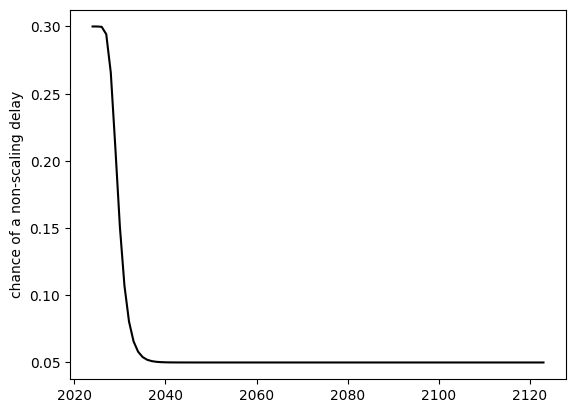

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2034 -

In [6]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.01614  | 1.07      | 3.812     | 7.846     |
| 8         | -0.01043  | 0.5362    | 8.194     | 5.371     |
| 38        | -0.01016  | 0.4544    | 9.317     | 4.845     |
| 41        | -0.01     | 0.01      | 10.0      | 8.869     |
| 43        | -0.01     | 0.01      | 3.592     | 5.027     |
| 49        | -0.01     | 0.01      | 8.39      | 4.844     |
| 53        | -0.01     | 0.01      | 2.303     | 4.398     |
| 57        | -0.01     | 0.01      | 5.892     | 4.083     |
| 66        | -0.01     | 0.01      | 4.114     | 3.568     |
| 112       | -0.01     | 0.01      | 6.59      | 3.613     |
Curve params found
{'push': 0.01, 'shift': 6.590320958215827, 'slope': 3.6133561021124208}
-
## Chance of nonscaling delay ##


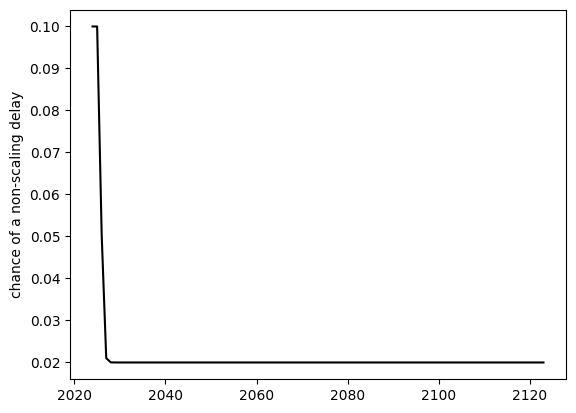

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2034 - chanc

In [7]:
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Take off speeds

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.2025   | 7.831     | 6.123     | 0.3869    |
| 7         | -0.1765   | 3.489     | 9.354     | 7.463     |
| 13        | -0.1366   | 0.8933    | 3.354     | 9.405     |
| 21        | -0.04619  | 1.058     | 8.628     | 0.1073    |
Curve params found
{'push': 1.0583305609585236,
 'shift': 8.62834096157453,
 'slope': 0.10730911567953666}
-
## Chance of nonscaling delay ##


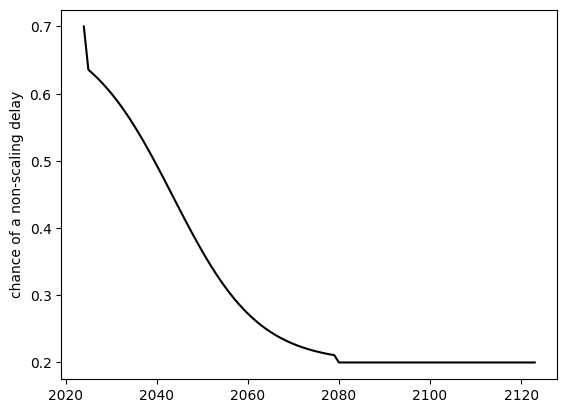

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 64%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 63%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 62%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 62%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 61%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 58%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2034

In [8]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [10]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-12-26 12:09:10.927495
